# Housing Price Prediction

## Problem Statement 
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 


The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

2. How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.


## Business Goal 


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Methodology
Model development is divided into multiple steps as mentioned below,

- Data exploring and understanding: This step involves preliminary level data understanding and exploring.
- Data Cleaning: This step includes cleaning the existing data. We check the data for any missing values and treat them as per the requirements. We also need to look for constant value colulmns as that is not going to add any additional value to out analysis. Sometimes columns with very high proportion of any particular value also doesn't add any values. Hence, getting rid of them helps with further analysis.
- Data Visualization: This step involves visualizing our dataset and check for relationship amongst independent variables. We can also reduce some feature columns here but it should not be aggressive.
- Data Preparation: This step is mainly usefull for feeding in the data into the model. It involves steps like creating dummy variables, scaling etc. depending upond the data type.
- Train-test split: As data already training data this step may be skipped.
- Model Development-validation and evaluaiton: This steps involves training the model and validate it. It involves evaluating the model using relevant matrics.
- Conclusion/Recommendation: It involves drawing conclusions and recommendations to business.

### Importing dependencies

In [1084]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
%matplotlib inline

### Reading Dataset

In [1085]:
#Reading data
#Housing data= hd
hd= pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\train.csv")
hd.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1. Data Understanding and Exploration

In [1086]:
#Understanding data
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1087]:
#Lets check null values 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [1088]:
#Dropping columns with null value ~50% including variable FireplaceQu having 47.26% null values. 
#Further Nill value label is avaible in theses variables thus chances of these null vales being None are less.
hd=hd.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [1089]:
#As we can see there are multiple categorical varaibles lets list them out as ordinal, nominal categorical variables,
#Continous/numeric variavles, year & month etc.
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

numeric = ["LotFrontage","LotArea","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
         "LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr",
         "KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageCars","GarageArea","WoodDeckSF",
        "OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","BsmtFinSF1","BsmtFinSF2"]

year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

In [1090]:
#Lets check for dupliacte values
hd.duplicated().value_counts()

False    1460
dtype: int64

## 2. Data Visualization

In [1091]:
# ALl the Numeric variables are either int or float type data type
#Lot size and MiscVal has higher values in comparison to other numeric varaibles, thus it will be analyzied seperately
numeric.remove("LotArea") 
numeric.remove("MiscVal") 

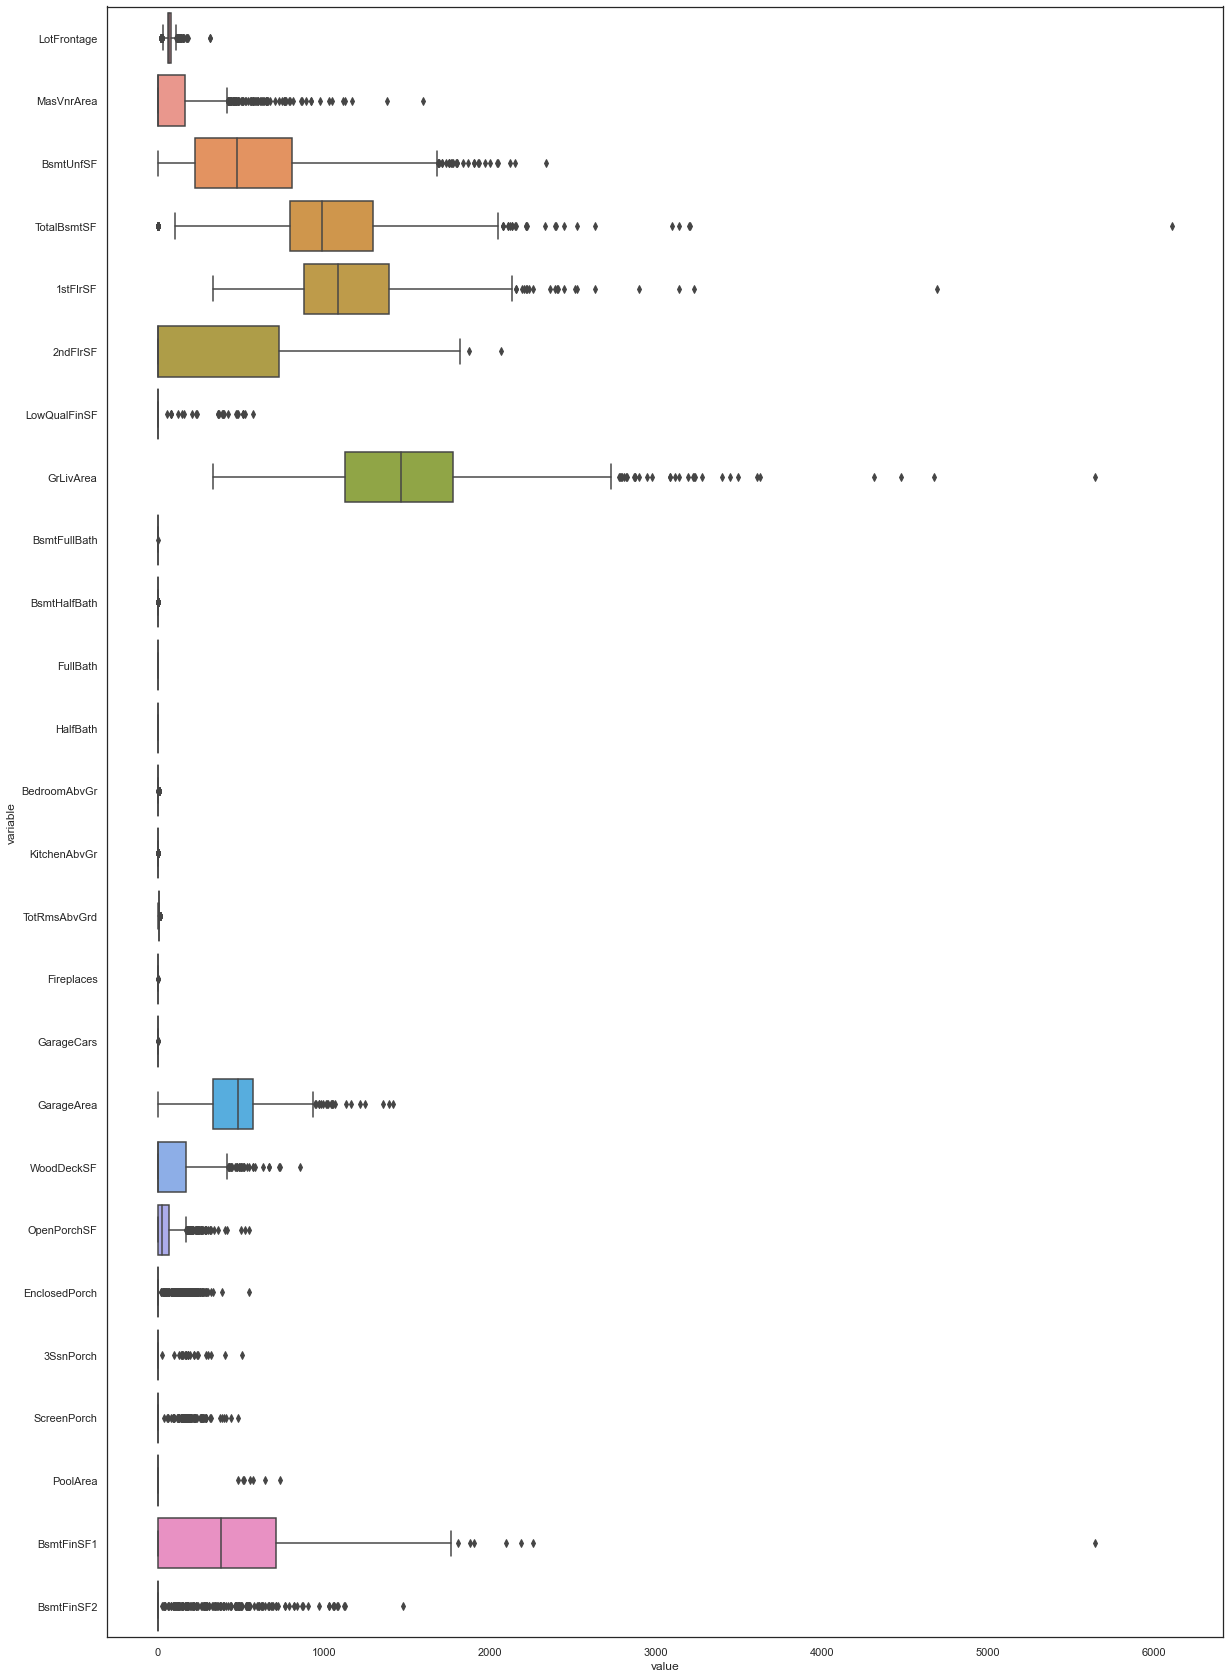

In [1092]:
#Lets do the univariate analysis on Numeric data typesLotArea
plt.figure(figsize=(20,30))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[numeric]))
plt.show()

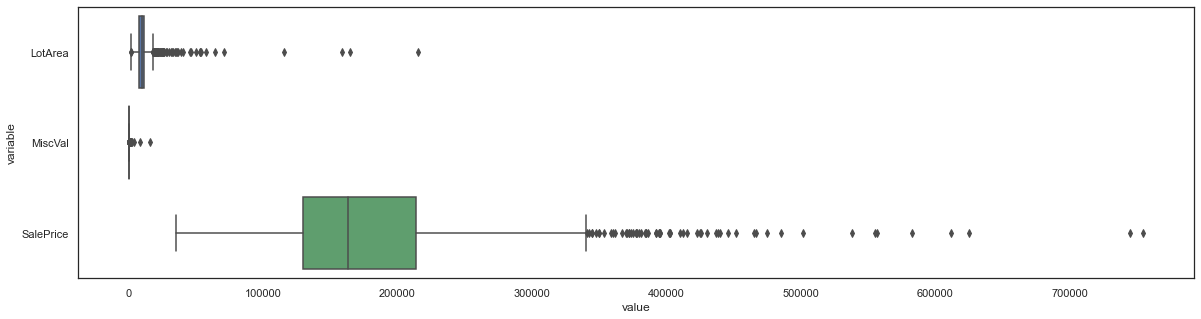

In [1093]:
#box plot for LotArea and MiscVal variable
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[["LotArea","MiscVal","SalePrice"]]))
plt.show()

There are lots of outliers in various columns like LotArea, BsmtFinSF2, GrLivArea, 1stFlrSF etc. and we have to treat them before modeling.
    

In [1094]:
#plt.subplots(figsize=(20,110))
   
#j=1
#for i in numeric:
 #   plt.subplot(int((len(numeric)/2)+1),3,j)
  #  sns.histplot(hd[i])
   # plt.xticks(rotation=90)
    #j=j+1  

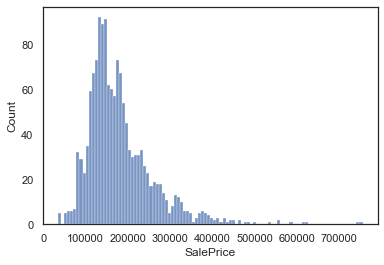

In [1095]:
#Sale price is our dependent/target variable
#Lets check distribution of sales 
sns.histplot(hd.SalePrice, bins=100)
plt.show()

As we can distribution is highly right skewed

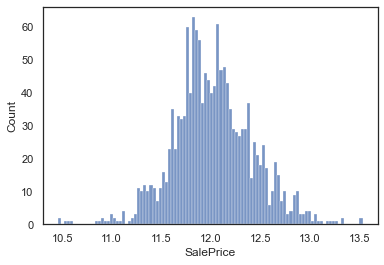

In [1096]:
#Lets log transform our SalePrice as sales data is 
hd.SalePrice= np.log(hd.SalePrice)
sns.histplot(hd.SalePrice, bins=100)
plt.show()

In [1097]:
#log_transform=['LotFrontage','GrLivArea','TotalBsmtSF','1stFlrSF']
#for i in log_transform:
 #   hd[i]= np.log(hd[i])

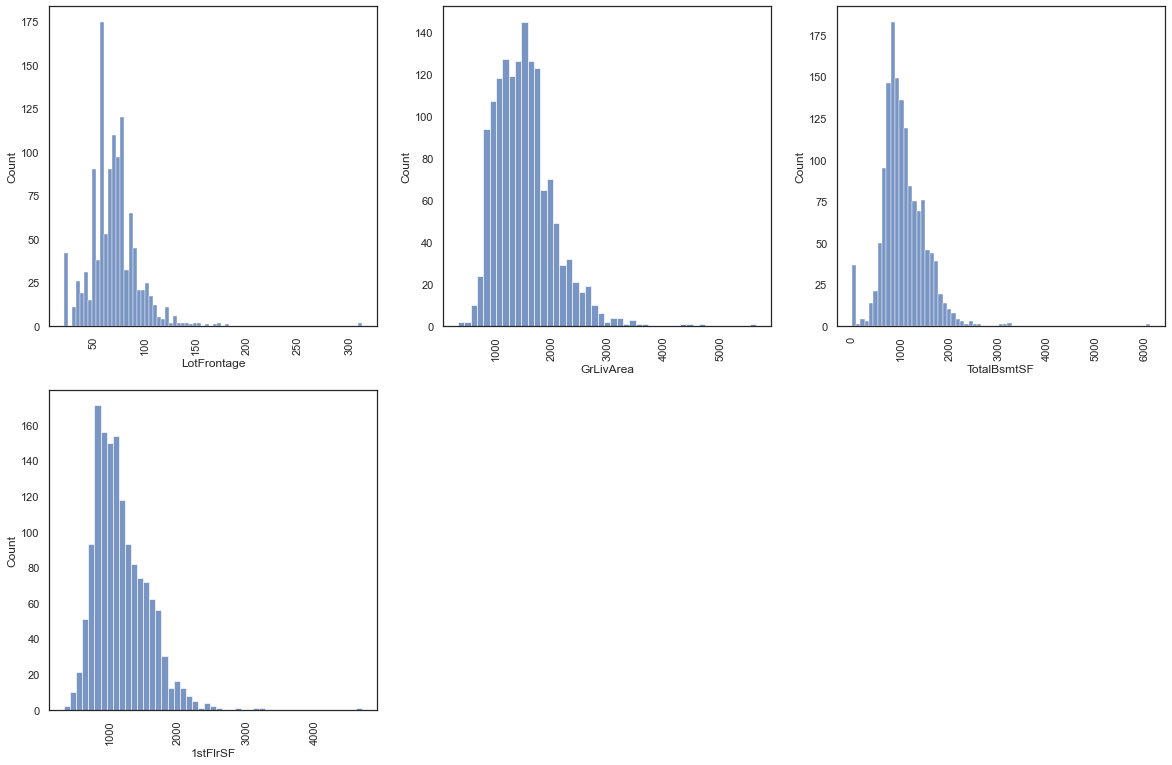

In [1098]:
plt.subplots(figsize=(20,20))
   
j=1
for i in log_transform:
    plt.subplot(int((len(log_transform)/2)+1),3,j)
    sns.histplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1  

As seen above after log transformation data is now more bell shaped/Guassian distribution.

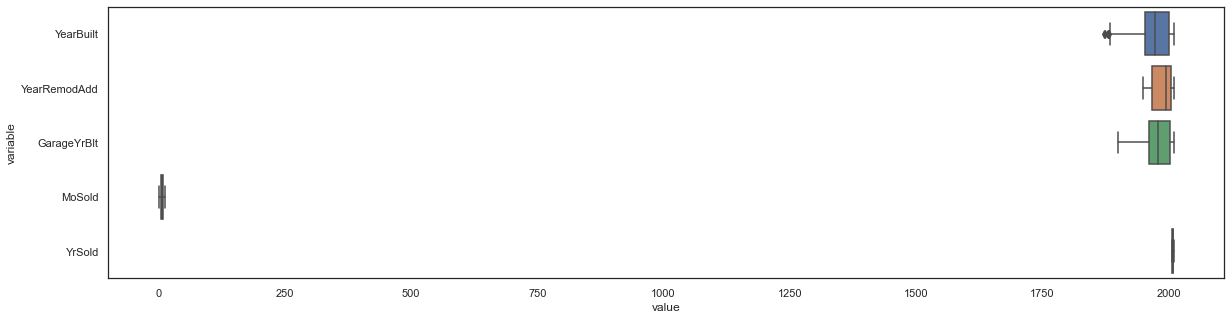

In [1099]:
#Lets also check outliers in year and month data
plt.figure(figsize=(20,5))
sns.boxplot(x="value", y="variable",data=pd.melt(hd[year_month]))
plt.show()

In [1100]:
numeric.append("LotArea")
numeric.append("MiscVal")

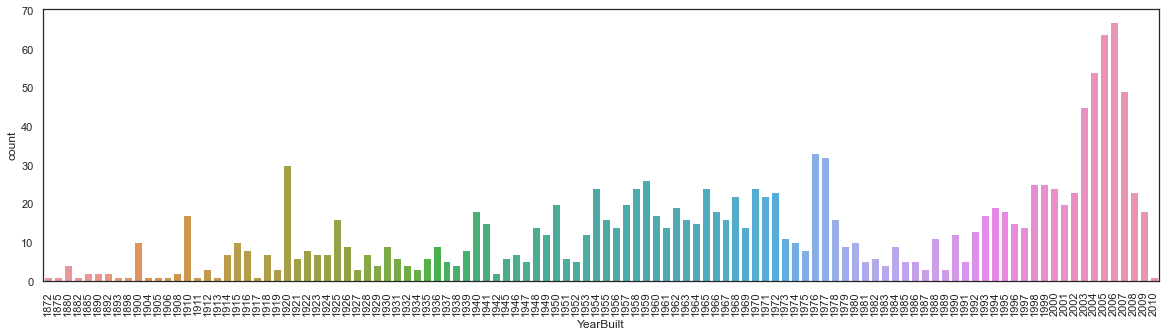

In [1101]:
#Lets Visualize frequency of houses built in each year
#year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd_YearBuilt=hd.sort_values("YearBuilt", axis =0)
plt.figure(figsize=(20,5))
sns.countplot(hd_YearBuilt["YearBuilt"])
plt.xticks(rotation =90)
plt.show()

There is a significant increase in houses being built around 2003 to 2007, may be leading to housing crash of 2008 :p

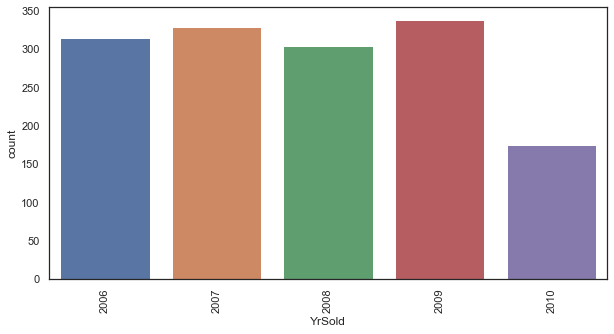

In [1102]:
#Lets Visualize frequency of sales made in each year
hd_YrSold=hd.sort_values("YrSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_YrSold["YrSold"])
plt.xticks(rotation =90)
plt.show()

There is no regular trend among no. of houses sold except that no. of houses sold in 2010 has significantly decreased, however we donot know whether data is for complete year 2010  or not, so will not speculate regarding this.

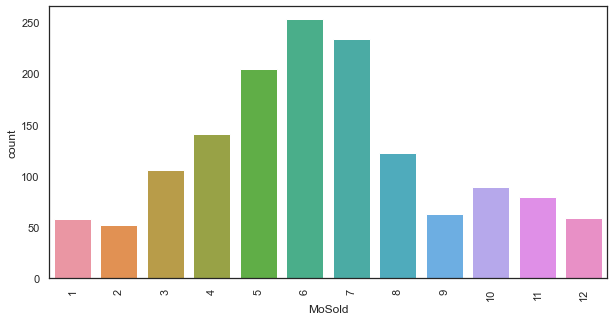

In [1103]:
#Lets Visualize frequency of sales made in each month
hd_MoSold=hd.sort_values("MoSold", axis =0)
plt.figure(figsize=(10,5))
sns.countplot(hd_MoSold["MoSold"])
plt.xticks(rotation =90)
plt.show()

It seems like sales are higher in the month of May, June and July comapared to other months of year.

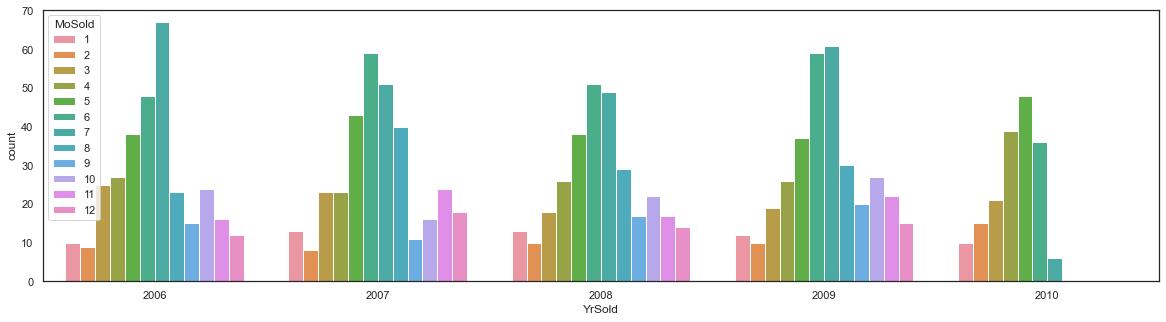

In [1104]:
#Lets check whether above trend is same for all years in which houses were sold
plt.figure(figsize=(20,5))
#hd_month_yr=hd.groupby(["YrSold","MoSold"]).count().reset_index()
#hd_month_yr
sns.countplot(data=hd, x="YrSold", hue="MoSold")
plt.show()

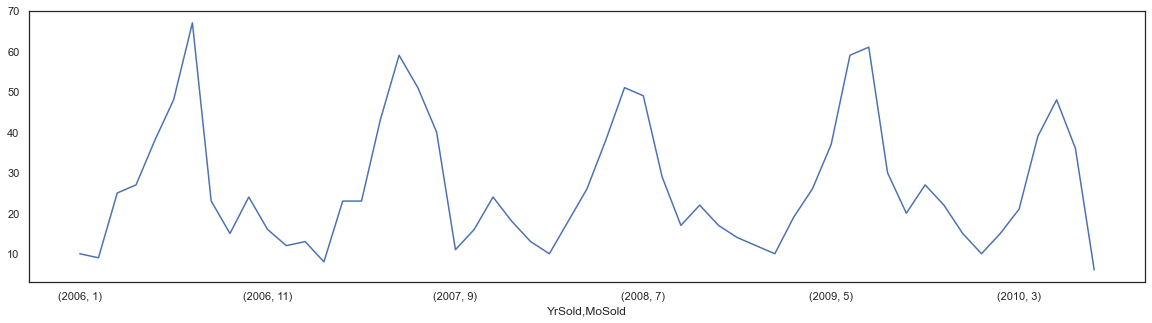

In [1105]:
plt.figure(figsize=(20,5))
hd_month_yr=hd.groupby(["YrSold","MoSold"])["MoSold"].count().plot()
plt.show()

From above it is observed that sales are higher in the month of May, June and July compared to other months of year may be due spring season as the weather gets warmer in USA. Further, there is very small peak in month of October/Novemeber in sale of houses.
Also for year 2010 data is available till July month only.

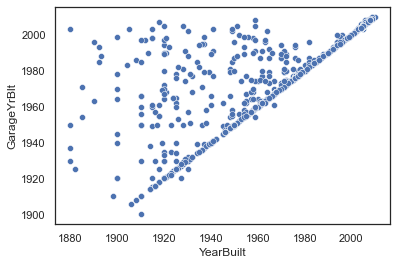

In [1106]:
#Lets Visualize distribution among YearBuilt & GarageYrBlt
sns.scatterplot(data=hd,x="YearBuilt",y="GarageYrBlt")
plt.show()

After 1910 almost all the house are having garrages built along with construction of house due to rise in no of car user by 1910 in US.
- Source:
https://www.ushistory.org/us/46a.asp

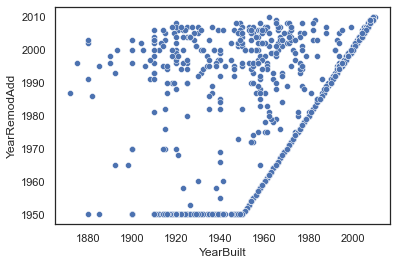

In [1107]:
#Lets Visualize distribution among YearBuilt & YearRemodAdd
sns.scatterplot(data=hd,x="YearBuilt",y="YearRemodAdd")
plt.show()

After 1950 there has been no remodeling or additions performed on houses as in data it is specified that YearRemodAdd is same as construction date if no remodeling or additions.

plt.figure(figsize=(20,20))
sns.heatmap(hd[numeric].corr(),annot= True,cmap="YlGnBu")
plt.show()

There are few columns with high corelation like (BsmtFinSF2 and BsmtfullBath),(GarageCars and Garage Area), (Ground Living area and TotRmsaboveGr),(Bedroom above ground and Total Room above Ground), (TotalBasment SF and  1st floor SF)  etc.

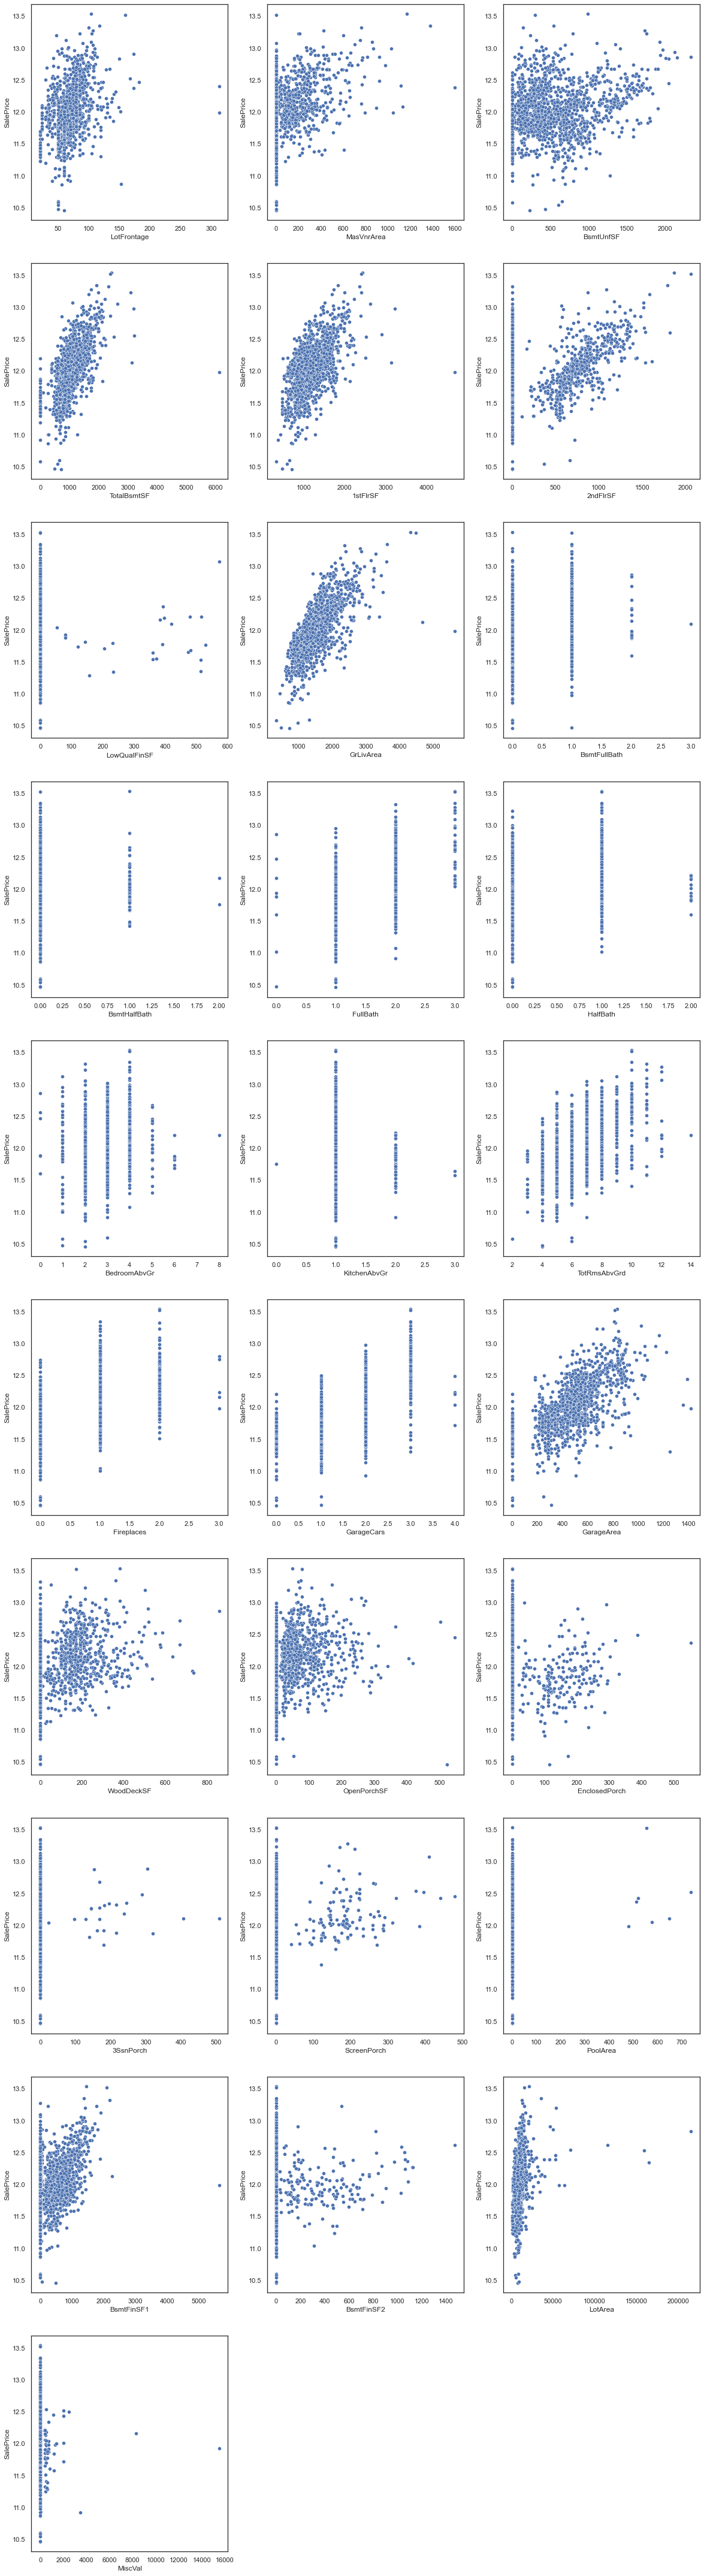

In [1108]:
#Lets visualize countplot on Numeric data
plt.subplots(figsize=(20,110))
j=1
for i in numeric:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.scatterplot(data=hd, x=i ,y="SalePrice")
    j=j+1

There are many independent Variable on which there is high correlation with Sale price like GrLivArea, TotalBsmtSF,Garage Area, 1stflrSF etc

#Lets visualize countplot on Nominal data
plt.subplots(figsize=(20,110))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),3,j)
    sns.countplot(hd[i])
    plt.xticks(rotation=90)
    j=j+1


#Lets visualize distribution of sales price on Nominal data
plt.subplots(figsize=(20,120))
j=1
for i in nominal:
    plt.subplot(int((len(nominal)/2)+1),2,j)
    sns.barplot(data=hd, x=i, y="SalePrice", estimator=np.median) # as there are outliers in data median is selected as estimator
    plt.xticks(rotation=90)
    j=j+1

## 3.  Data Cleaning

### 3.1. Treating Outliers

As features columns have many outliers, we are going to drop outliers from the dataset and try to fit the algorithm. For dropping the outliers we are going to use Inter Quantile Range (IQR) method which is summarized below.

- Q1: First quanltile value or Value standing exactly at 10% (here).
- Q3: Value standing at exactly 90% (here) of the range.
- IQR is difference between Q3 and Q1 value. 

This indicates the core range for any feature which includes median as well.
Next is to drop the values which are beyond 1.5 times IQR away from either Q1 or Q3 in respective away direction. Here, away direction for Q1 is lower side and Q3 is upper side.

Note: Here we can use any value for selecting quantiles. The chosen values depend upon the amount of data available and its quality. Also we should not lose significant value of data while dropping outliers.

In [1109]:
#Lets check % of outliers in the numeric variables
numeric_=numeric  +["SalePrice"]
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

In [1110]:
outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
ScreenPorch,116,7.945205
BsmtFinSF2,94,6.438356
BsmtHalfBath,82,5.616438
KitchenAbvGr,68,4.657534
MiscVal,52,3.561644
LowQualFinSF,26,1.780822
LotArea,24,1.643836
3SsnPorch,24,1.643836
MasVnrArea,13,0.890411
EnclosedPorch,9,0.616438


In [1111]:
#As seen above there are lots of outliers in the dataset as we have limited data removing theses rows won't be a good idea.
#Let us perform flooring and capping on outliers

for i in numeric_:
    IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10) #Interquartile range
    upper_bound=hd[i].quantile(0.90)+1.5 * IQR
    lower_bound=hd[i].quantile(0.10)-1.5 * IQR
    #Capping
    hd[i]=np.where(hd[i]>upper_bound, upper_bound,hd[i])
    #Flooring
    hd[i]=np.where(hd[i]<lower_bound, lower_bound,hd[i])
    

In [1112]:
#Lets check % of outliers in the numeric variables after capping and flooring
outlietrs_dict={}
for i in numeric_:
  #IQR
  IQR= hd[i].quantile(0.90)-hd[i].quantile(0.10)
  Outliers= hd[(hd[i]>(hd[i].quantile(0.90)+1.5 * IQR)) | (hd[i]<(hd[i].quantile(0.10)-1.5 * IQR))]
  outlietrs_dict[i]=Outliers.shape[0]

outlier_data=pd.DataFrame([outlietrs_dict]).T
outlier_data.rename(columns={0:"No_of_outliers"}, inplace =True)
outlier_data["Outlier%"]=outlier_data["No_of_outliers"]/hd.shape[0]*100
outlier_data.sort_values("Outlier%", ascending =False, inplace =True)
outlier_data

,No_of_outliers,Outlier%
LotFrontage,0,0.0
Fireplaces,0,0.0
MiscVal,0,0.0
LotArea,0,0.0
BsmtFinSF2,0,0.0
BsmtFinSF1,0,0.0
PoolArea,0,0.0
ScreenPorch,0,0.0
3SsnPorch,0,0.0
EnclosedPorch,0,0.0


## 3.2 Treating Missing values

In [1113]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [1114]:
#Lets impute median value as missing values in numeric columns
num_missing=["LotFrontage","MasVnrArea","GarageYrBlt"]
for i in num_missing:
    hd[i]=hd[i].fillna(hd[i].median())

In [1115]:
#Lets impute mode value as missing values in categorical columns
Cat_missing=["MasVnrType", "Electrical"]
for i in Cat_missing:
    hd[i]=hd[i].fillna(hd[i].mode()[0])
# for BsmtQual, BsmtCond, BsmtExposure,BsmtFinType1,BsmtFinType2,GarageType,GarageFinish,GarageQual,GarageCond  
#"NA" means No basement/No Garage
hd["BsmtQual"]=hd["BsmtQual"].fillna("No basement")
hd["BsmtCond"]=hd["BsmtCond"].fillna("No basement")
hd["BsmtExposure"]=hd["BsmtExposure"].fillna("No basement")
hd["BsmtFinType1"]=hd["BsmtFinType1"].fillna("No basement")
hd["BsmtFinType2"]=hd["BsmtFinType2"].fillna("No basement")
hd["GarageType"]=hd["GarageType"].fillna("No Garage")
hd["GarageFinish"]=hd["GarageFinish"].fillna("No Garage")
hd["GarageQual"]=hd["GarageQual"].fillna("No Garage")
hd["GarageCond"]=hd["GarageCond"].fillna("No Garage")

In [1116]:
# Checking columns with null value 
hd.isnull().sum()/hd.shape[0]*100

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath 

## 4. Data Preperation

Now as we know have of many categorical variables, we need to treat these  variables in order to draw patterns from them through modelling.Now we have two types of categorical variables:
1. Nominal categorical variables
2. Ordered categorical variables

- For Nominal Nominal categorical variables we will create dummy variables; for `k` no of labels/categories in variables we will define `k-1` no. of features and original variable shall be dropped.
- For Ordered categorical variables we will implement Label encoding in incresing order of categories in variable as 0,1,2,3,4,....

### 4.1 Nominal categorical variables

In [1117]:
nominal = ["MSSubClass","MSZoning","Street","LandContour","Utilities","LotConfig","LandSlope"
    ,"Neighborhood","Condition1","Condition2","BldgType","HouseStyle","RoofStyle","RoofMatl","Exterior1st"
    ,"Exterior2nd","MasVnrType","Foundation","Heating","HeatingQC","CentralAir","Electrical","Functional"
    ,"GarageType","PavedDrive","SaleType","SaleCondition"]

In [1118]:
#Creating dummy variables for all the categorical variables

for i in nominal:
    dummy_df=pd.get_dummies(hd[i],prefix=i, drop_first =True)
    hd=pd.concat([hd,dummy_df], axis=1)
    hd=hd.drop([i], axis=1)

### 4.2 Ordered categorical variables

In [1119]:
ordinal = ["LotShape","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
         "BsmtFinType1","BsmtFinType2","KitchenQual","GarageFinish","GarageQual","GarageCond"]

In [1120]:
#Few of variables are already labeled as per rating like OverallQual,OverallCond etc.
# Creating Label Encoding for LotShape
def Label_encoder(feature):
    if feature == "IR3": return 1
    elif feature=="IR2": return 2
    elif feature=="IR1": return 3
    elif feature =="Reg": return 4
hd["LotShape"]=hd["LotShape"].apply(Label_encoder)

In [1121]:
# Creating Label Encoding for ExterQual
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterQual"]=hd["ExterQual"].apply(Label_encoder)

In [1122]:
# Creating Label Encoding for ExterCond
def Label_encoder(feature):
    if feature == "Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["ExterCond"]=hd["ExterCond"].apply(Label_encoder)

In [1123]:
# Creating Label Encoding for BsmtQual
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtQual"]=hd["BsmtQual"].apply(Label_encoder)

In [1124]:
#Creating Label Encoding for BsmtCond
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature =="Gd": return 4
    elif feature =="Ex": return 5
hd["BsmtCond"]=hd["BsmtCond"].apply(Label_encoder)

In [1125]:
#Creating Label Encoding for BsmtExposure
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="No": return 1
    elif feature=="Mn": return 2
    elif feature=="Av": return 3
    elif feature =="Gd": return 4
hd["BsmtExposure"]=hd["BsmtExposure"].apply(Label_encoder)

In [1126]:
#Creating Label Encoding for BsmtFinType1
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType1"]=hd["BsmtFinType1"].apply(Label_encoder)

In [1127]:
#Creating Label Encoding for BsmtFinType2
def Label_encoder(feature):
    if feature == "No basement": return 0
    elif feature=="Unf": return 1
    elif feature=="LwQ": return 2
    elif feature=="Rec": return 3
    elif feature =="BLQ": return 4
    elif feature =="ALQ": return 5
    elif feature =="GLQ": return 6
hd["BsmtFinType2"]=hd["BsmtFinType2"].apply(Label_encoder)

In [1128]:
#Creating Label Encoding for KitchenQual
def Label_encoder(feature):
    if feature == "Poor": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature =="Ex": return 4
hd["KitchenQual"]=hd["KitchenQual"].apply(Label_encoder)

In [1129]:
#Creating Label Encoding for GarageFinish
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Unf": return 1
    elif feature=="RFn": return 2
    elif feature=="Fin": return 3
hd["GarageFinish"]=hd["GarageFinish"].apply(Label_encoder)

In [1130]:
#Creating Label Encoding for GarageQual
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageQual"]=hd["GarageQual"].apply(Label_encoder)

In [1131]:
#Creating Label Encoding for GarageCond
def Label_encoder(feature):
    if feature == "No Garage": return 0
    elif feature=="Po": return 1
    elif feature=="Fa": return 2
    elif feature=="TA": return 3
    elif feature=="Gd": return 4
    elif feature=="Ex": return 5
hd["GarageCond"]=hd["GarageCond"].apply(Label_encoder)

In [1132]:
hd=hd.drop(["Id"], axis =1)

## 5. Feature Engineering

### 5.1. Derived Metrics

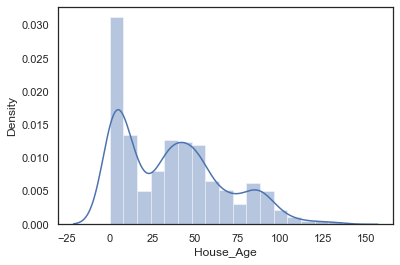

In [1133]:
#Lets create a feature with age of house
year_month = ["YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
hd["House_Age"]=hd["YrSold"]-hd["YearBuilt"]
sns.distplot(hd["House_Age"])
plt.show()

In [1134]:
#Lets visualize variation between yearbuilt and House_Age
#plt.figure(figsize=(10,5))
#sns.scatterplot(hd.YearBuilt,hd.House_Age)
#plt.show()

As `yearbuilt` & `House_Age` are highly corelated it is prudent to drop `YearBuilt` feature

In [1135]:
#hd=hd.drop(["YearBuilt"], axis=1)

In [1136]:
#year_month.remove("YearBuilt")

### 5.2. Interest Rate

Lets add US Fed interest rate as a feature. Interest rate determine how much we will have to pay to borrow money to buy a property, and they influence the value of real estate. Low interest rates tend to increase demand for property, driving up prices, while high interest rates generally do the opposite.

#lets import interest rate data 
#Source: https://fred.stlouisfed.org/series/FEDFUNDS
interest_df=pd.read_csv(r"C:\Users\Rohit Chaudhary\Desktop\Upgrad notes\ML2\Assignment\interest rate.csv")
interest_df.rename(columns={"INTDSRUSM193N":"Interest_rate"}, inplace=True)

interest_df.DATE=pd.to_datetime(interest_df.DATE)
interest_df["YrSold"]=interest_df.DATE.dt.year
interest_df["MoSold"]=interest_df.DATE.dt.month
interest_df=interest_df.drop(["DATE"],axis=1)

plt.figure(figsize=(10,5))
sns.lineplot(interest_df.YrSold,interest_df.Interest_rate)
plt.show()

hd=hd.merge(interest_df, on=["YrSold","MoSold"], how="inner")

#Lets visualize interest rates from 2006 to 2010
sns.lineplot(hd.YrSold,hd.Interest_rate, color='r')
plt.xticks(rotation="90")
plt.show()

Interest rates has been significantly reduced by Feds from 6% to 1% mainly because of Recession due to Housing bubble.

Lets visualize impact of interest rate on sale prices
plt.figure(figsize=(10,5))
sns.scatterplot(hd.Interest_rate,hd.SalePrice, hue=hd.YrSold)
plt.show()

In [1137]:
#Lets check correlation among the data
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
x=list(hd.columns)
x.remove("SalePrice")
print("Top Absolute Correlations")
print(get_top_abs_correlations(hd[x], 50))


Top Absolute Correlations
MSSubClass_90        BldgType_Duplex          1.000000
Exterior1st_CBlock   Exterior2nd_CBlock       1.000000
YearBuilt            House_Age                0.999036
SaleType_New         SaleCondition_Partial    0.986819
MSSubClass_190       BldgType_2fmCon          0.983395
Exterior1st_VinylSd  Exterior2nd_VinylSd      0.977525
Exterior1st_CemntBd  Exterior2nd_CmentBd      0.974171
Exterior1st_MetalSd  Exterior2nd_MetalSd      0.973065
GarageQual           GarageCond               0.959172
GarageCond           GarageType_No Garage     0.946245
GarageQual           GarageType_No Garage     0.942499
MSSubClass_80        HouseStyle_SLvl          0.942259
RoofStyle_Gable      RoofStyle_Hip            0.933462
MSSubClass_45        HouseStyle_1.5Unf        0.925181
Exterior1st_HdBoard  Exterior2nd_HdBoard      0.883271
GarageCars           GarageArea               0.882475
MSZoning_FV          Neighborhood_Somerst     0.862807
Exterior1st_Wd Sdng  Exterior2nd_Wd Sdn

There are lot of features which are highly corelated. We will drop one of the feature from pair with high collenarity>0.7, Accordingly, dropping following:

`'YrSold','GarageArea','YearBuilt','Exterior2nd_HdBoard','MSZoning_FV','Exterior2nd_WdSdng','TotRmsAbvGrd','HouseStyle_2Story',
'MSZoning_RM','1stFlrSF','MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85','GarageType_Detchd',
'ExterQual','BsmtFinType1','RoofStyle_Shed'`


In [1138]:
col_drop=['MSSubClass_90','Exterior2nd_CBlock','YearBuilt','SaleCondition_Partial','BldgType_2fmCon',
        'Exterior2nd_VinylSd','Exterior2nd_CmentBd','Exterior2nd_MetalSd','GarageCond','GarageType_No Garage',
        'HouseStyle_SLvl','RoofStyle_Hip','HouseStyle_1.5Unf','YrSold', 'GarageArea','Exterior2nd_HdBoard',
        'MSZoning_FV','Exterior2nd_Wd Sdng','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','1stFlrSF',
        'MasVnrType_None','HouseStyle_1Story', 'Foundation_CBlock','Exterior2nd_Stucco','BldgType_TwnhsE',
        'GarageYrBlt','SaleType_WD','MSSubClass_60','Exterior2nd_Plywood','Heating_GasW','MSSubClass_85',
        'GarageType_Detchd','ExterQual','BsmtFinType1','RoofStyle_Shed']                                                             

In [1139]:
hd=hd.drop(col_drop, axis=1)

Checking unique values in dataset in order to drop features with single value or 1 unique value as these features will not be helful in prediction

In [1140]:
Nil_unique_value_col=[]
for i in hd.columns:
    if len(hd[i].unique())==1:
        Nil_unique_value_col.append(i)
print(Nil_unique_value_col)

['LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [1141]:
#Dropping these features as they are making any value addition
hd=hd.drop(Nil_unique_value_col, axis=1)

## 6. Model Development-validation and evaluaton

In [1142]:
#As we have been provided with only train dataset, test_train split shall not be required in instant case.

In [1143]:
#We need to scale the data in order to interpret data and to expedite the process of gradient descent
#Remaining numeric features which require scaling 
vars_scale=ordinal+numeric+year_month +['House_Age','SalePrice',]#,'Interest_rate',
for i in (Nil_unique_value_col+['ExterQual', 'BsmtFinType1', 'GarageCond', '1stFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'GarageYrBlt', 'YrSold','YearBuilt']):
    vars_scale.remove(i)

In [1144]:
#Lets perform normalization on the numeric data
from sklearn.preprocessing import MinMaxScaler
#Creating scaler object
scaler=MinMaxScaler()
# Now normalization needs to be performed on all the numeric and label encoded varaibles
hd[vars_scale]=scaler.fit_transform(hd[vars_scale])

In [1145]:
hd.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageFinish,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_RH,MSZoning_RL,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_Duplex,BldgType_Twnhs,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_ImStucc,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_Stone,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,House_Age
0,0.287582,0.263311,1.000000,0.666667,0.500,0.883333,0.234030,0.5,0.8,0.75,0.25,0.265040,0.166667,0.0,0.064212,0.280642,0.413559,0.372521,0.4,0.666667,0.5,0.428571,1.0,0.0,0.666667,0.50,0.6,0.000000,0.187692,0.000000,0.090909,0.581431,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.036765
1,0.385621,0.305661,1.000000,0.555556,0.875,0.433333,0.000000,0.5,0.8,0.75,1.00,0.367152,0.166667,0.0,0.121575,0.413750,0.000000,0.251235,0.0,0.666667,0.0,0.428571,0.5,0.4,0.666667,0.50,0.6,0.454962,0.000000,0.000000,0.363636,0.536319,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.227941
2,0.307190,0.366425,0.666667,0.666667,0.500,0.866667,0.193433,0.5,0.8,0.75,0.50,0.182450,0.166667,0.0,0.185788,0.301625,0.419370,0.393096,0.4,0.666667,0.5,0.428571,1.0,0.4,0.66

In [1146]:
#Defining X & Y for Regression
X_train=hd.drop(["SalePrice"], axis=1)
y_train=(hd["SalePrice"])

In [1147]:
X_train.shape

(1460, 173)

## 6.1 Linear Regression

#### 6.1.1 Hyperparameter tunning to find out best no. of features in model using Grid searchCV and rfe as estimator

In [1148]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#lr=LinearRegression()
#folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
#lr.fit(X_train, y_train)
#rfe=RFE(lr)
#As we don't want model to be complex checking behaviour of model upto 50 features
#hyper_params=[{'n_features_to_select':list(range(1,51))}] 
#cv_model=GridSearchCV(estimator=rfe,
 #                     param_grid=hyper_params,
  #                    scoring="r2",
   #                   cv=folds,
    #                  verbose=1,
     #                 return_train_score=True)
#cv_model.fit(X_train, y_train)

In [1149]:
#cv_resuls=pd.DataFrame(cv_model.cv_results_)
#cv_model.best_params_

In [1150]:
#lets plot mean test and train score to calculate ideal no. of features
#cv_plot = cv_resuls[cv_resuls['param_n_features_to_select']<=27]
#plt.figure(figsize=(20,8))
#plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_test_score"])
#plt.plot(cv_plot["param_n_features_to_select"],cv_plot["mean_train_score"])
#plt.xlabel('number of features')
#plt.ylabel('r-squared')
#plt.title("Optimal Number of Features")
#plt.legend(['test score', 'train score'], loc='upper left')
#plt.show()

Thus at around 40 no. of features r squared is maximum for train and test through cross validation and also it is seen that after 50 no. of variables test r squared is highle unstable.

#### 6.1.2 Linear regression with 27 no. of features using RFE

In [1151]:
#Linear Regression Object
lr=LinearRegression()
rfe=RFE(lr,50)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=50)

In [1152]:
#Top 27 no. of features in regression modeL
rfe_df=pd.DataFrame()
rfe_df["features"]=X_train.columns
rfe_df["Selected"]=rfe.support_
rfe_df["Ranking"]=rfe.ranking_
features=list(rfe_df[rfe_df["Ranking"]==1]["features"].values)

In [1153]:
#Linear Regression using these top 40 features
lr=LinearRegression()
lr.fit(X_train[features], y_train)

LinearRegression()

#### 6.1.3 Predictions and Residual Analysis

In [1154]:
#Lets verify assumptions of Linear Regression on residuals
y_train_pred=lr.predict(X_train[features])

In [1155]:
#Residuals 
res_train=y_train_pred-y_train

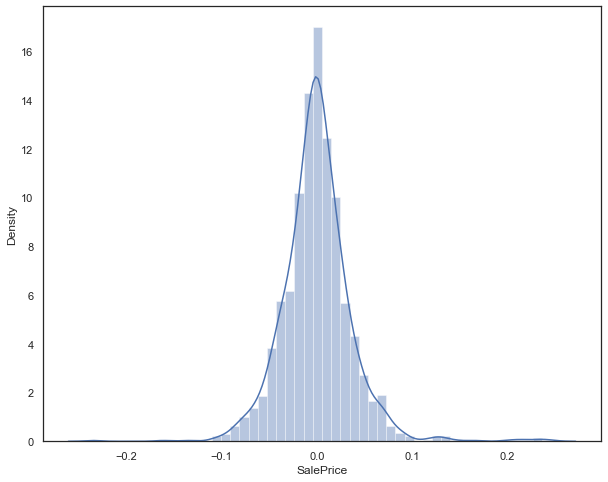

In [1156]:
#Lets check residuals distribution
plt.figure(figsize=(10,8))
sns.distplot(res_train)
plt.show()

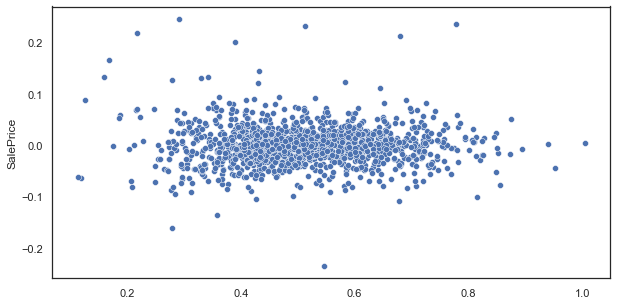

In [1157]:
#Checking Homoscedasticity
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred, res_train)
plt.show()

In [1158]:
#Coefficients in model
Lin_reg_coeff=pd.DataFrame({"Feature":X_train[features].columns, "coeff":lr.coef_ })
Lin_reg_coeff.sort_values(by="coeff", ascending =False, inplace =True)
Lin_reg_coeff

,Feature,coeff
24,RoofMatl_Membran,0.627874
25,RoofMatl_Metal,0.609461
29,RoofMatl_WdShngl,0.595894
27,RoofMatl_Tar&Grv,0.589846
23,RoofMatl_CompShg,0.572163
26,RoofMatl_Roll,0.560521
28,RoofMatl_WdShake,0.556555
5,GrLivArea,0.353062
1,OverallQual,0.189340
4,TotalBsmtSF,0.175310


In [1159]:
pip install RegscorePy

Note: you may need to restart the kernel to use updated packages.


In [1160]:
#Checking r2 score and mean_squared_error on  train data after Linear Regression
from RegscorePy import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def get_evaluation_metrics(true,predicted,Regression, features):
    Evaluation_metric=pd.DataFrame({"R_squared_score": round(r2_score(true, predicted),3),
                                    "Adjusted R2 score" :round(1 - (1-r2_score(true, predicted))*((1460-1)/(1460-features-1)),3),
                                    "Mean absolute error":round(mean_absolute_error(true, predicted),5),
                                    "Mean Squared error":round(mean_squared_error(true, predicted),5),
                                    "AIC" : round(aic.aic(true, predicted, features),2),
                                    "BIC" : round(bic.bic(true, predicted, features),2),
                                   "Features":features}, index=[Regression])
    print("Evaluation metrics are as under:")
    return Evaluation_metric
Linear_regression_metrics=get_evaluation_metrics(y_train,y_train_pred, "Linear_regression",len(features))
Linear_regression_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Linear_regression,0.92,0.917,0.02533,0.00135,-9550.25,-9285.95,50


## 6.2 Ridge Regression

In Ridge regression additional penalty of lambda times sum of all the sum of sqaure of errors is added to cost function.
- Firstly we we will calculate best value of lambda using Grid Search CV
- Then using this lambda model will be tunned and predictions evaluation shall be made

#### 6.2.1 Ridge Regression with GridSearchCV for hypertunning alpha parameter

In [1161]:
from sklearn.linear_model import Ridge
folds=5
ridge=Ridge()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.001,0.01,0.1,1,2,3,4,5,6,7,8,9,10,100,1000]}
for score in score_params:
    model_cv=GridSearchCV(estimator=ridge,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ", score , "as parameter ",model_cv.best_params_ )

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 3}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 2}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 3}


In [1162]:
#Regression model using alpha as 4
ridge=Ridge(4)
ridge.fit(X_train, y_train)

Ridge(alpha=4)

#### 6.2.2 Predictions and Residual Analysis

In [1163]:
#Coeffecient of Ridge Regression
y_train_pred=ridge.predict(X_train)
Coeff_ridge=pd.DataFrame({"Feature":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge", ascending =False, inplace =True)
Coeff_ridge

,Feature,coeff_ridge
17,GrLivArea,0.143843
3,OverallQual,0.129464
15,TotalBsmtSF,0.082958
4,OverallCond,0.079136
25,GarageCars,0.060478
11,BsmtFinSF1,0.057184
76,Neighborhood_StoneBr,0.047295
108,RoofMatl_WdShngl,0.046488
1,LotArea,0.045447
19,FullBath,0.044612


In [1164]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics=get_evaluation_metrics(y_train,y_train_pred,"Ridge_Regression",X_train.shape[1] )
Ridge_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.919,0.908,0.02474,0.00137,-9275.38,-8360.86,173


In [1165]:
#Residuals
res_train=y_train_pred-y_train

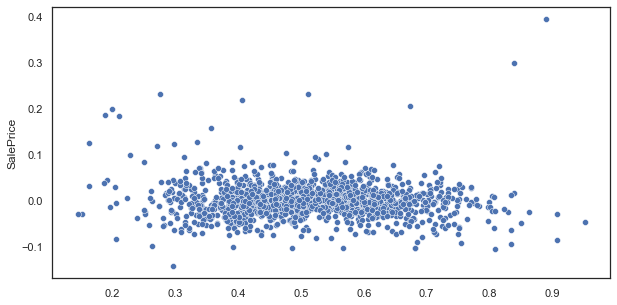

In [1166]:
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred,res_train)
plt.show()

## 6.3 Lasso Regression

In Lasso regression additional penalty of lambda times sum of all the sum of absolute errors is added to cost function. As compared to Ridge Regression lasso regression also helps in feature elimination. As seen above in ridge regression there are many models, in order to predict which features are affected Sale price of houses.

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

#### 6.3.1 Lasso Regression with GridSearchCV for hypertunning alpha parameter

In [1167]:
from sklearn.linear_model import Lasso
folds=5
lasso=Lasso()
score_params=["r2","neg_mean_absolute_error","neg_mean_squared_error"]
parmas={"alpha":[0,0.005,0.006,0.007,0.0008,0.0009,0.001,0.0011,0.0015,0.01,0.1,1,10]}
for score in score_params:
    model_cv=GridSearchCV(estimator=lasso,
                         param_grid =parmas,
                         scoring=score,
                         cv=folds,
                         verbose=1,
                         return_train_score=True)
    model_cv.fit(X_train, y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0}
Fitting 5 folds for each of 13 candidates, totalling 65 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}


In [1168]:
#Lasso object 
lasso=Lasso(0.0008)
#fitting
lasso.fit(X_train, y_train)

Lasso(alpha=0.0008)

#### 6.3.2 Predictions and Residual Analysis

In [1169]:
#Coeffecients
y_train_pred=lasso.predict(X_train)
lasso_df=pd.DataFrame({"Feature":X_train.columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)
lasso_df[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
17,GrLivArea,0.258922
3,OverallQual,0.191683
25,GarageCars,0.071575
15,TotalBsmtSF,0.058920
11,BsmtFinSF1,0.044829
4,OverallCond,0.038267
1,LotArea,0.035843
23,Fireplaces,0.031806
5,YearRemodAdd,0.029815
43,MSZoning_RL,0.026369


In [1170]:
#no. of features after Lasso Regression
len(lasso_df[lasso_df["coeff_lasso"]!=0])

38

So after Lasso Regression we are left with only 38 features from 173 no. of total features.

In [1171]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics=get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression",len(lasso_df[lasso_df["coeff_lasso"]!=0]))
Lasso_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38


In [1172]:
#residuals
res_train=y_train_pred-y_train

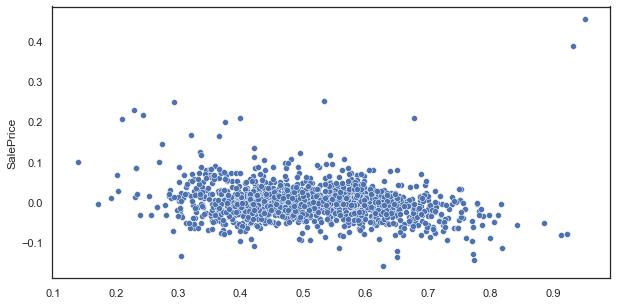

In [1173]:
#variance of residuals
plt.figure(figsize=(10,5))
sns.scatterplot(y_train_pred,res_train)
plt.show()

## 6.4 ElasticNet Regression

In Elasticnet regression is a balanced regression technique which comprises of both ridge and lasso regession

- Firstly we we will calculate best value of lambda using Grid Search CV.
- Using this lambda model will be tunned and predictions evaluation shall be made.

In [1174]:
from sklearn.linear_model import ElasticNet
#folds
folds=5
params_grid=({'alpha': [0,0.0001, 0.0002,0000.3,0.0004,0.0005,0.0006, 0.0007,0.0008,0.0009,0.001,0.01,0.1,10,100, 1000]})

elastic=ElasticNet()
scoring_para=["r2","neg_mean_squared_error","neg_mean_absolute_error"]
for score in scoring_para:
    cv_model=GridSearchCV(estimator=elastic,
                         cv=folds,
                         scoring=score,
                         param_grid=params_grid,
                         verbose=1,
                         return_train_score=True)
    cv_model.fit(X_train,y_train)
    print("Considering ",score , "as parameter ",model_cv.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  r2 as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_squared_error as parameter  {'alpha': 0.0008}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Considering  neg_mean_absolute_error as parameter  {'alpha': 0.0008}


In [1175]:
#modelling using alpha as 0.0008
elastic=ElasticNet(0.0008)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.0008)

In [1176]:
y_train_pred=elastic.predict(X_train)
elastic_df=pd.DataFrame({"Feature":X_train.columns, "coeff_elastic":elastic.coef_ })
elastic_df.sort_values(by="coeff_elastic", ascending =False, inplace =True)
elastic_df[elastic_df["coeff_elastic"]!=0]

,Feature,coeff_elastic
17,GrLivArea,0.246767
3,OverallQual,0.175425
15,TotalBsmtSF,0.071613
25,GarageCars,0.071263
4,OverallCond,0.071110
11,BsmtFinSF1,0.045367
1,LotArea,0.042784
75,Neighborhood_Somerst,0.031061
23,Fireplaces,0.029563
70,Neighborhood_NridgHt,0.028749


In [1177]:
elastic_df[elastic_df["coeff_elastic"]!=0].shape[0]

51

So in using Elastic net Regression we are left with 53 no. of features

In [1178]:
Elastic_metrics=get_evaluation_metrics(y_train,y_train_pred,"Elastic_Regression",elastic_df[elastic_df["coeff_elastic"]!=0].shape[0])
Elastic_metrics

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Elastic_Regression,0.904,0.9,0.02673,0.00163,-9274.39,-9004.79,51


In [1179]:
#Comaprison of evaluation metrics
Comp_df=pd.concat([Ridge_metrics,Lasso_metrics, Linear_regression_metrics,Elastic_metrics])
Comp_df.head()

,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.919,0.908,0.02474,0.00137,-9275.38,-8360.86,173
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38
Linear_regression,0.920,0.917,0.02533,0.00135,-9550.25,-9285.95,50
Elastic_Regression,0.904,0.900,0.02673,0.00163,-9274.39,-9004.79,51


	R_squared_score	Adjusted R2 score	Mean absolute error	Mean Squared error	AIC	BIC	Features
Ridge_Regression	0.917	0.906	0.02485	0.00139	-9254.903090	-8340.391923	173
Lasso_Regression	0.887	0.884	0.02936	0.00191	-9066.663038	-8865.787753	38
Linear_regression	0.915	0.913	0.02658	0.00143	-9482.292223	-9270.844554	40
Elastic_Regression	0.902	0.899	0.02677	0.00165	-9250.655840	-8970.487679	53

#### From above it is observed that:
- As per R2 score:  `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean absolute error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per Mean Squared error : `Ridge_Regression>Linear_reg>Elastic_Regression>Lasso_Regression`
- As per AIC  : `Lasso_Regression>Elastic_Regression>Ridge_Regression>Linear_reg`
- As per BIC  : `Ridge_Regression>Lasso_Regression>Elastic_Regression>Linear_reg`    
- No. of features: `Lasso_Regression>Linear_reg>Elastic_Regression>Ridge_Regression`

From above, Ridge Regression is performing slightly better compared to other models in terms of BIC, AIC, adjusted R2 score.

In [1180]:
#Lets check out top ten coefficent in all the models 
top_ten_elastic_coeff=elastic_df[elastic_df["coeff_elastic"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_lasso_coeff=lasso_df[lasso_df["coeff_lasso"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_ridge_coeff=Coeff_ridge[Coeff_ridge["coeff_ridge"]!=0].head(10).reset_index().drop(["index"], axis=1)
top_ten_linear_coeff=Lin_reg_coeff[Lin_reg_coeff["coeff"]!=0].head(10).reset_index().drop(["index"], axis=1)

In [1181]:
comp_coeff=pd.concat([top_ten_elastic_coeff,top_ten_lasso_coeff,top_ten_ridge_coeff,top_ten_linear_coeff], axis=1)
comp_coeff

,Feature,coeff_elastic,Feature,coeff_lasso,Feature,coeff_ridge,Feature,coeff
0,GrLivArea,0.246767,GrLivArea,0.258922,GrLivArea,0.143843,RoofMatl_Membran,0.627874
1,OverallQual,0.175425,OverallQual,0.191683,OverallQual,0.129464,RoofMatl_Metal,0.609461
2,TotalBsmtSF,0.071613,GarageCars,0.071575,TotalBsmtSF,0.082958,RoofMatl_WdShngl,0.595894
3,GarageCars,0.071263,TotalBsmtSF,0.058920,OverallCond,0.079136,RoofMatl_Tar&Grv,0.589846
4,OverallCond,0.071110,BsmtFinSF1,0.044829,GarageCars,0.060478,RoofMatl_CompShg,0.572163
5,BsmtFinSF1,0.045367,OverallCond,0.038267,BsmtFinSF1,0.057184,RoofMatl_Roll,0.560521
6,LotArea,0.042784,LotArea,0.035843,Neighborhood_StoneBr,0.047295,RoofMatl_WdShake,0.556555
7,Neighborhood_Somerst,0.031061,Fireplaces,0.031806,RoofMatl_WdShngl,0.046488,GrLivArea,0.353062
8,Fireplaces,0.029563,YearRemodAdd,0.029815,LotArea,0.045447,OverallQual,0.189340
9,Neighborhood_NridgHt,0.028749,MSZoning_RL,0.026369,FullBath,0.044612,TotalBsmtSF,0.175310


As seen above, there are few features which are common in almost all the models above like `GrLivArea, GarageArea, Fireplaces,OverallQual` , but as seen above as there is high collinearity among the features and also few features are having high p values.So we have to manully eliminate features.

Variable	coeff_elastic	Variable	coeff_lasso	Variable	coeff_ridge	Variable	coeff
0	GrLivArea	0.244694	GrLivArea	0.256891	GrLivArea	0.364142	RoofMatl_Membran	0.663965
1	OverallQual	0.177534	OverallQual	0.196321	GarageArea	0.157879	RoofMatl_Metal	0.645357
2	TotalBsmtSF	0.071867	TotalBsmtSF	0.059047	RoofMatl_WdShngl	0.093063	RoofMatl_WdShngl	0.641926
3	OverallCond	0.067346	GarageArea	0.058704	Neighborhood_StoneBr	0.071569	RoofMatl_Tar&Grv	0.631547
4	GarageArea	0.056135	BsmtFinSF1	0.041750	Fireplaces	0.069536	RoofMatl_CompShg	0.617112
5	LotArea	    0.043535	LotArea	0.037288	Neighborhood_Crawfor	0.062406	RoofMatl_WdShake	0.598736
6	BsmtFinSF1	0.042201	OverallCond	0.035242	Street_Pave	0.059232	RoofMatl_Roll	0.597158
7	Fireplaces	0.030938	Fireplaces	0.033408	LotArea	0.057040	GrLivArea	0.320636
8	Neighborhood_Somerst	0.029324	YearRemodAdd	0.030287	RoofMatl_Membran	0.055981	OverallQual	0.205299
9	Neighborhood_NridgHt	0.028917	MSZoning_RL	0.026016	SaleType_Con	0.037685	TotalBsmtSF	0.166633

### 6.5 Lets evaluate changes in the model if we choose double the value of alpha for both ridge and lasso

#### 6.5.1 Ridge Regression with alpha=8

In [1182]:
#Regression model using alpha as 8 i.e. double of optimum
ridge=Ridge(8)
ridge.fit(X_train, y_train)

#Coeffecient of Ridge Regression
y_train_pred=ridge.predict(X_train)
Coeff_ridge=pd.DataFrame({"Feature":X_train.columns, "coeff_ridge":ridge.coef_ })
Coeff_ridge.sort_values(by="coeff_ridge", ascending =False, inplace =True)
Coeff_ridge

,Feature,coeff_ridge
17,GrLivArea,0.113857
3,OverallQual,0.112320
15,TotalBsmtSF,0.073670
4,OverallCond,0.065192
25,GarageCars,0.059237
11,BsmtFinSF1,0.056324
19,FullBath,0.047699
1,LotArea,0.043282
76,Neighborhood_StoneBr,0.042742
70,Neighborhood_NridgHt,0.036941


In [1183]:
#Checking r2 score and mean_squared_error on tet and train data after Ridge Regression
Ridge_metrics_alpha_double=get_evaluation_metrics(y_train,y_train_pred,"Ridge_Regression_double_alpha",X_train.shape[1] )
Ridge_metrics_alpha_double

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression_double_alpha,0.913,0.901,0.0257,0.00147,-9177.45,-8262.94,173


#### 6.5.2 Lasso Regression with alpha=0.0008 x 2= 0.0016

In [1184]:
#Lasso object 
lasso=Lasso(0.0016)
#fitting
lasso.fit(X_train, y_train)
#Coeffecients
y_train_pred=lasso.predict(X_train)
lasso_double_alpha=pd.DataFrame({"Feature":X_train.columns, "coeff_lasso":lasso.coef_ })
lasso_double_alpha.sort_values(by="coeff_lasso", ascending =False, inplace =True)
lasso_double_alpha[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
17,GrLivArea,0.220780
3,OverallQual,0.198862
25,GarageCars,0.072423
15,TotalBsmtSF,0.043066
5,YearRemodAdd,0.040160
23,Fireplaces,0.038182
11,BsmtFinSF1,0.036720
22,KitchenQual,0.027531
43,MSZoning_RL,0.025107
1,LotArea,0.022138


In [1185]:
#Checking r2 score and mean_squared_error on tet and train data after Lasso Regression
Lasso_metrics_alpha_double=get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression_double_alpha",len(lasso_double_alpha[lasso_df["coeff_lasso"]!=0]))
Lasso_metrics_alpha_double

Evaluation metrics are as under:


,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Lasso_Regression_double_alpha,0.859,0.856,0.03418,0.00237,-8747.61,-8546.73,38


In [1186]:
#Comaprison of evaluation metrics aftre doubling alpha with earlier alpha
Comp_double_alpha=pd.concat([Ridge_metrics,Ridge_metrics_alpha_double, Lasso_metrics,Lasso_metrics_alpha_double])
Comp_double_alpha

,R_squared_score,Adjusted R2 score,Mean absolute error,Mean Squared error,AIC,BIC,Features
Ridge_Regression,0.919,0.908,0.02474,0.00137,-9275.38,-8360.86,173
Ridge_Regression_double_alpha,0.913,0.901,0.02570,0.00147,-9177.45,-8262.94,173
Lasso_Regression,0.889,0.886,0.02921,0.00187,-9095.83,-8894.96,38
Lasso_Regression_double_alpha,0.859,0.856,0.03418,0.00237,-8747.61,-8546.73,38


- In terms of  R2 score, AIC & BIC for Ridge Regression is performing much better after doubling alpha compared to Lasso Regression, so it is better to choose Ridge Regression model in instant case for the purpose of prediction. However, it is observed that Lasso regression helps in feature elimination and out main objective is to find out features which are affecting the model we will choose Lasso regression with alpha =0.0008.
- As we know, In Ridge, when we increase the value of alpha, the most important features may shrink a little bit and the less important feature stay at high value. However, with LASSO when we increase the value of alpha the most important features shrink a little bit and the coefficents of less important features is zerod. Thus, LASSO is able to exclude non important features from the model.

#### 6.1.4 Model Evaluation w.r.t to significance of Faetues and VIF

In [1190]:
#Lets check whether these features are significant or not
#As there are 38 no. of features, let us also check p value & VIF
# Features with non zero coefficients
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]['Feature'])

#For checking p values
import statsmodels.api as sm
X_train_sm =sm.add_constant(X_train[Col_check_features])
lm=sm.OLS(y_train,X_train_sm ).fit()
print(lm.summary())

#For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif_df=pd.DataFrame()
    vif_df["features"]= X.columns
    vif_df["vif"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif_df["vif"]=round(vif_df["vif"],2)
    vif_df.sort_values("vif", ascending =False, inplace=True )
    return vif_df
#VIF(X_train[Col_check_features])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     357.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:09:40   Log-Likelihood:                 2629.1
No. Observations:                1460   AIC:                            -5180.
Df Residuals:                    1421   BIC:                            -4974.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0201 

As we can see above, there are multiple features with high p values and High VIF values. We need to remove these variables stepwise in order to come to features which are effecting Sales price maximum. But lets first comapre the performance of Linear, Ridge and Lasso Regression.

In [1189]:
lasso_df[lasso_df["coeff_lasso"]!=0]

,Feature,coeff_lasso
17,GrLivArea,0.258922
3,OverallQual,0.191683
25,GarageCars,0.071575
15,TotalBsmtSF,0.058920
11,BsmtFinSF1,0.044829
4,OverallCond,0.038267
1,LotArea,0.035843
23,Fireplaces,0.031806
5,YearRemodAdd,0.029815
43,MSZoning_RL,0.026369


In [ ]:
#plt.figure(figsize=(20,20))
#sns.scatterplot(hd.index,y_train, color='r')
#sns.scatterplot(hd.index,y_train_pred,color='b')
#plt.show()

In [ ]:
#Lets check whether these features are significant or not
import statsmodels.api as sm
X_train_sm =sm.add_constant(X_train[features])
lm=sm.OLS(y_train,X_train_sm ).fit()
lm.summary()

In [ ]:
#Features with coeff greater than 0
#Col_check_features=list(Coeff_lasso[(Coeff_lasso["coeff_lasso"]>0.000463) | (Coeff_lasso["coeff_lasso"]<-0.000253)]["Variable"])
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])

In [ ]:
#Lets check VIF on the features these coefficint other than 0
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif_df=pd.DataFrame()
    vif_df["features"]= X.columns
    vif_df["vif"]=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
    vif_df["vif"]=round(vif_df["vif"],2)
    vif_df.sort_values("vif", ascending =False, inplace=True )
    return vif_df
VIF(hd[Col_check_features]) 

As we can see there is high VIF in `OverallQual` feature. So will stepwise remove features untill there is no multicolinearity

In [ ]:
#dropping OverallQual feature
features.remove('OverallQual')

In [ ]:
#Lets define function for Lasso Regression
from sklearn.model_selection import GridSearchCV

def get_best_alpha_Lasso_Reg(X,y):
    lasso=Lasso()
    folds=5
    score_para=["r2","neg_mean_squared error","neg_absolute_error"]
    parmas={"alpha":[0,0.005,0.006,0.007,0.0008,0.0009,0.001,0.0011,0.0015,0.01,0.1,1,10]}
    for score in score_para:
        model_cv=GridSearchCV(estimator=lasso,
                             cv=folds,
                             param_grid=parmas,
                             scoring=score,
                             verbose=1,
                             return_train_score=True)
        model_cv.fit(X,y)
        return model_cv.best_params_

In [ ]:
get_best_alpha_Lasso_Reg(X_train[features], y_train)

In [ ]:
lasso=Lasso(0.0008)
lasso.fit(X_train[features], y_train)
y_train_pred=lasso.predict(X_train[features])
lasso_df=pd.DataFrame({"Variable":X_train[features].columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)


In [ ]:
get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression")

In [ ]:
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])
VIF(hd[Col_check_features])

As we can see there is high VIF in `BsmtQual` feature. So will stepwise remove features untill there is no multicolinearity

In [ ]:
features.remove('BsmtQual')
get_best_alpha_Lasso_Reg(X_train[features], y_train)

In [ ]:
lasso=Lasso(0.0008)
lasso.fit(X_train[features], y_train)
y_train_pred=lasso.predict(X_train[features])
lasso_df=pd.DataFrame({"Variable":X_train[features].columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)

In [ ]:
get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression")

In [ ]:
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])
VIF(hd[Col_check_features])

As we can see there is high VIF in `OverallCond` feature. So will stepwise remove features untill there is no multicolinearity

In [ ]:
features.remove('OverallCond')


In [ ]:
get_best_alpha_Lasso_Reg(X_train[features], y_train)

In [ ]:
lasso=Lasso(0.0008)
lasso.fit(X_train[features], y_train)
y_train_pred=lasso.predict(X_train[features])
lasso_df=pd.DataFrame({"Variable":X_train[features].columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)

In [ ]:
get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression")

In [ ]:
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])
VIF(hd[Col_check_features])

As we can see there is high VIF in `TotalBsmtSF` feature. So will stepwise remove features untill there is no multicolinearity

In [ ]:
features.remove('TotalBsmtSF')
get_best_alpha_Lasso_Reg(X_train[features], y_train)

In [ ]:
lasso=Lasso(0.0008)
lasso.fit(X_train[features], y_train)
y_train_pred=lasso.predict(X_train[features])
lasso_df=pd.DataFrame({"Variable":X_train[features].columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)
lasso_df[lasso_df["coeff_lasso"]!=0]

In [ ]:
get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression")

In [ ]:
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])
VIF(hd[Col_check_features])

As we can see there is high VIF in `LotArea` feature. So will stepwise remove features untill there is no multicolinearity

In [ ]:
features.remove('LotArea')
get_best_alpha_Lasso_Reg(X_train[features], y_train)

In [ ]:
lasso=Lasso(0.0008)
lasso.fit(X_train[features], y_train)
y_train_pred=lasso.predict(X_train[features])
lasso_df=pd.DataFrame({"Variable":X_train[features].columns, "coeff_lasso":lasso.coef_ })
lasso_df.sort_values(by="coeff_lasso", ascending =False, inplace =True)
lasso_df[lasso_df["coeff_lasso"]!=0]

In [ ]:
get_evaluation_metrics(y_train,y_train_pred,"Lasso_Regression")

In [ ]:
Col_check_features=list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])
VIF(hd[Col_check_features])

In [ ]:
#Lets check whether these features are significant or not
import statsmodels.api as sm
X_train_sm =sm.add_constant(X_train[list(lasso_df[lasso_df["coeff_lasso"]!=0]["Variable"])])
lm=sm.OLS(y_train,X_train_sm ).fit()
lm.summary()

In [ ]:
res_train=y_train_pred-y_train
plt.figure(figsize=(20,8))
sns.scatterplot(y_train_pred,res_train)
plt.show()